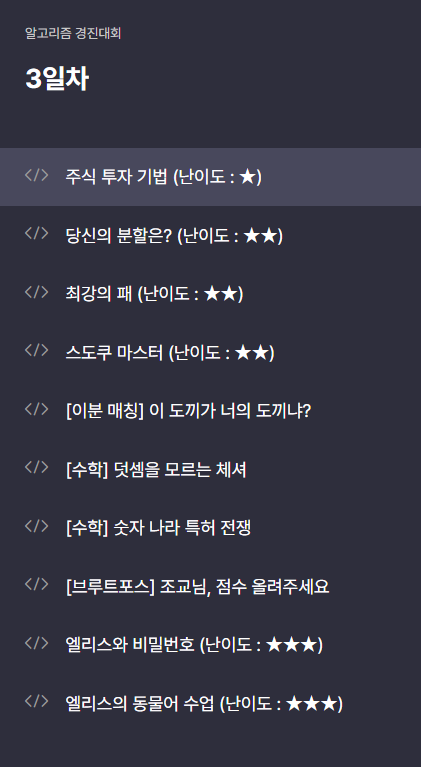

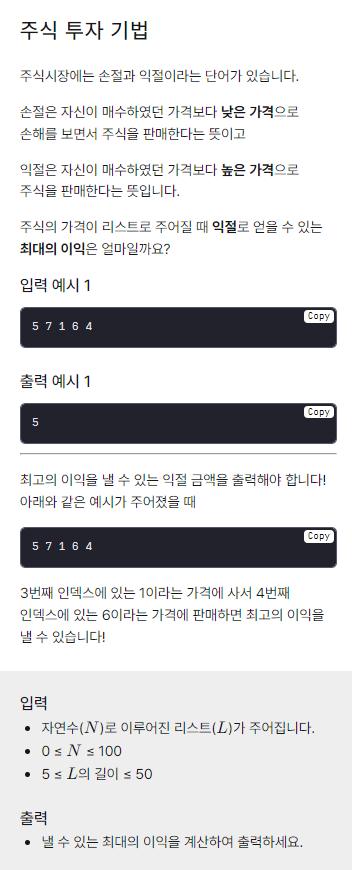

# ex01(완전 탐색)

In [ ]:
arr = list(map(int, input().split()))

Min = arr[0]
Max = 0

for i in range(1,len(arr)):
    if Min > arr[i]:
        Min = arr[i]
    else:
        if Max < arr[i] - Min:
            Max = arr[i] - Min
    
print(Max)

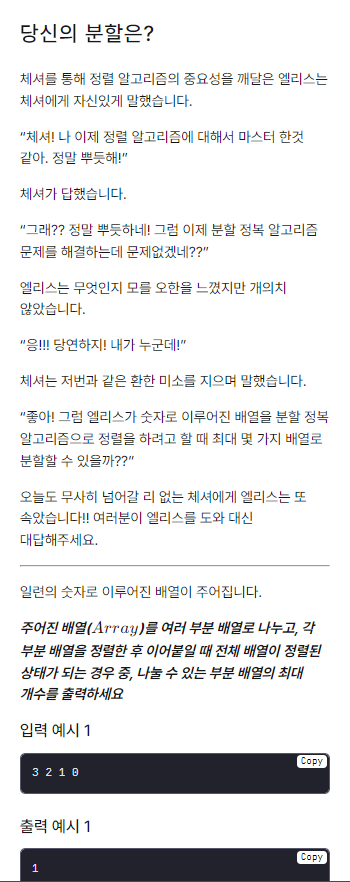

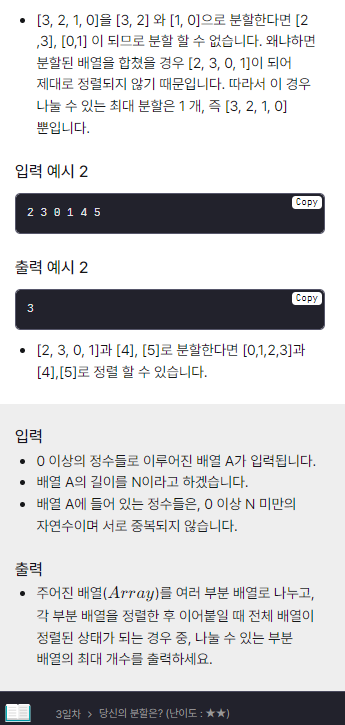

# ex02(정렬, 2일차 동일문제)

In [ ]:
arr = list(map(int, input().split()))

res = 0

index = 0
value = 0

for i in range(len(arr)):
    index+=i
    value+=arr[i]
    if index == value:
        res+=1
        
print(res)

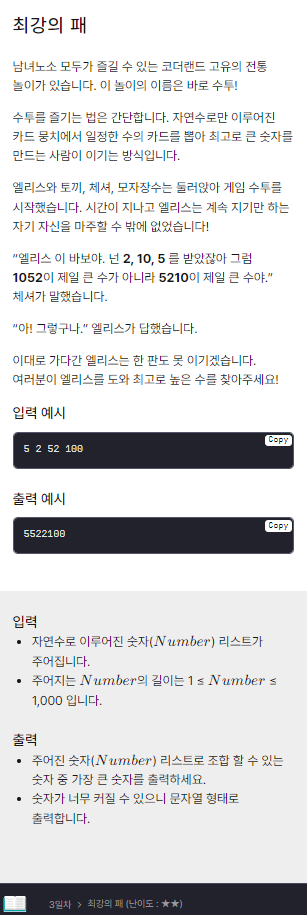

# ex03(정렬)

In [ ]:
arr = input().split()

for i in range(len(arr)-1):
    for j in range(len(arr)-1-i):
        if arr[j]+arr[j+1] <= arr[j+1]+arr[j]:
            arr[j],arr[j+1] = arr[j+1],arr[j]
            
print(''.join(arr))

In [ ]:
# def myQuickSort(nums, l, r):
#     if l >= r:
#         return 
        
#     # pos를 진행하면서 l에서 r까지의 범위가 정렬이 됨 (우선순위 가장 작은게 맨 뒤로 감)
#     # pos는 nums에서 가장 우선순위가 작은 값 
#     pos = partition(nums, l, r)
    
#     # QuickSort는 pos(우선선위가 가장 작은 값)
#     myQuickSort(nums, l, pos-1)
#     myQuickSort(nums, pos+1, r)

# def partition(nums, l, r):
#     print(nums, l, r)
#     low = l
#     while l < r:
#         # l + r > r + l 이면 
#         if compare(nums[l], nums[r]):
#             nums[l], nums[low] = nums[low], nums[l]
#             low += 1
            
#         l += 1
        
#     # 가장 낮은 순위 low를 가장 오른쪽 r과 변경 
#     # 여기서 r은 분할정복으로 들어왔기에 들어온 값중에서 마지막임 
#     nums[low], nums[r] = nums[r], nums[low]
#     return low

# def compare(n1, n2):
#     return str(n1) + str(n2) > str(n2) + str(n1)

# nums = input().split()
# nums = [int(i) for i in nums]

# myQuickSort(nums, 0, len(nums)-1)
# print(str(int("".join(map(str, nums))))) 

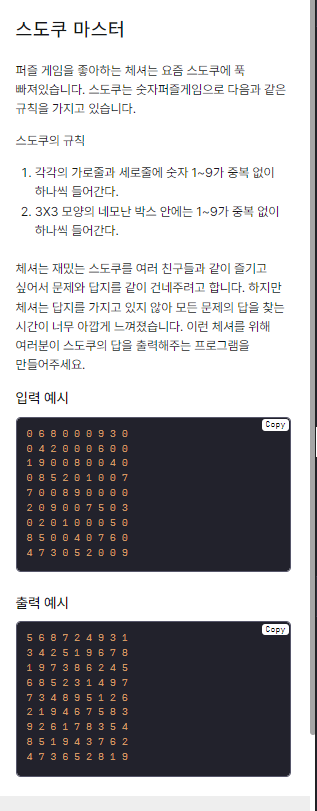

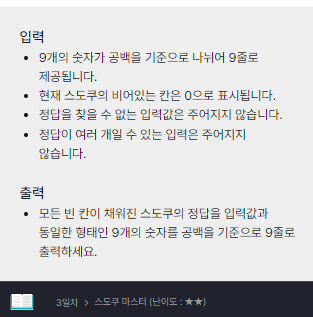

# ex04(완전 탐색)

In [ ]:
arr = []
for i in range(9):
    arr.append(list(map(int, input().split())))
    
done = False

def master(r,c, value):
    for i in range(9):
        if arr[r][i] == value:
            return False
    for i in range(9):
        if arr[i][c] == value:
            return False
    x = (r//3)*3
    y = (c//3)*3
    for i in range(3):
        for j in range(3):
            if arr[x+i][y+j] == value:
                return False
    return True
    
def answer():
    global done
    for i in range(9):
        for j in range(9):
            if arr[i][j] != 0:
                continue
            for k in range(1,10):
                if master(i,j,k):
                    arr[i][j] = k
                    answer()
                    if done:
                        return
                    arr[i][j] = 0
            return
    done = True
    return

answer()
for i in range(9):
    print(' '.join(map(str,arr[i])))



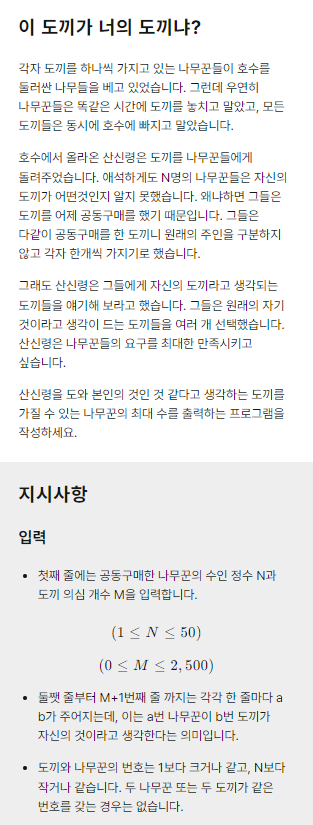

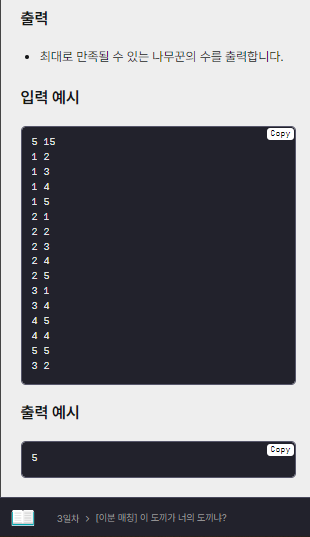

# ex05(이분매칭, 최대유량)
- 백준 1298
- Edmonds-Karp 알고리즘을 사용
- www.youtube.com/watch?v=RHyFfFUXHZE  

In [2]:
import sys
input = sys.stdin.readline

n, m = map(int, input().split())
s = [[] for i in range(n + 1)]
d = [0 for i in range(n + 1)]
cnt = 0

def axe(start):
    if visit[start] == 1:
        return 0
    visit[start] = 1
    for i in s[start]:
        if d[i] == 0 or axe(d[i]):
            d[i] = start
            return 1
    return 0

for i in range(m):
    a, b = map(int, input().split())
    s[a].append(b)

for i in range(1, n + 1):
    visit = [0 for i in range(n + 1)]
    if axe(i):
        cnt += 1
        
print(cnt)

ValueError: not enough values to unpack (expected 2, got 0)

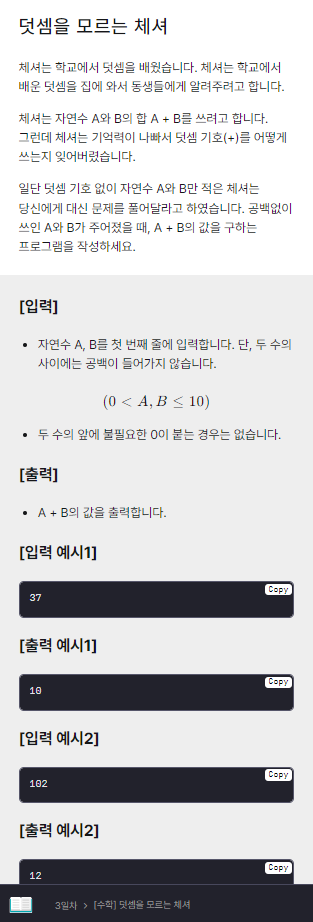

# ex06 (수학 백준15873)

In [12]:
arr = input()

# 한자리수 두개
if len(arr) == 2:		
    print(sum(map(int, [arr[0], arr[1]])))

# 10 10
elif len(arr) == 4:
    print(20)

# 한자리 + 10 / 10 + 한자리
else:
# 뒤가 10			
    if int(arr[-1]) == 0:		
        print(int(arr[0]) + 10)
# 앞이 10
    else:			
        print(int(arr[-1]) + 10)

[[]]


In [15]:
#  보고 감탄한거
# s = input()
# if s[1] == '0':
#     print(10 + int(s[2:]))
# else:
#     print(int(s[0]) + int(s[1:]))    

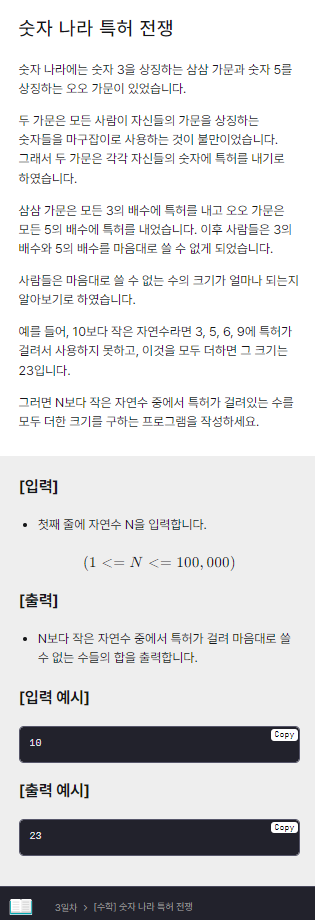

# ex07(수학)
- 반복문으로 1~n-1보다 작은 수를 3으로 나눠 몫이 0이면 count +
- 5로 나눈 값의 몫이 0이면 count + 

In [ ]:
N = int(input())

res = 0
for N in range(1, N):
    # 다중if문을 넣으면 3과 5의 공배수를 중복해서 더해서 틀렸었음
    if N % 3 == 0 or N % 5 == 0: 
        res += N
        
print(res)

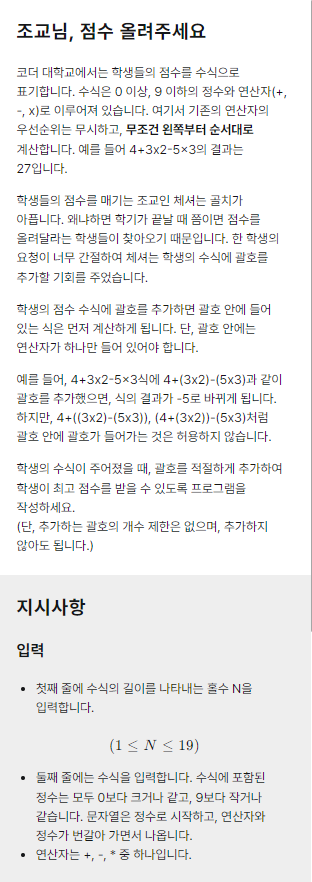

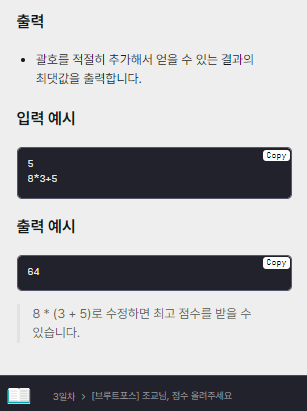

# ex08(브루트포스 백준16637) 
- https://unie2.tistory.com/1285
- https://codesyun.tistory.com/196)
- 연산자와 피연산자를 나누어 저장한다 (남은 개수 파악과 연산에 용이)

- 괄호는 연산자를 기준으로 선택한다

- i번 연산자를 괄호 추가했다면 i+1번 연산자에는 괄호를 추가할 수 없다 (괄호 중첩)

- 종료 조건

    ˙ 피연산자가 하나만 남은 경우

    ˙ 마지막 연산자까지 선택이 끝난 경우

In [ ]:
def cal_num(target, next, oper) :
    if oper == '+' :
        return target + next
    elif oper == '-' :
        return target - next
    elif oper == '*' :
        return target * next


def func(i, q) :
    if i == n - 1 :
        no_use = q + [data[i]]
        return cal_q(no_use)
    if i == n - 3 :
        no_use = q + [data[i], data[i+1]]
        temp = cal_num(data[i], data[i+2], data[i+1])
        use = q + [temp]
        return max(func(i+2, no_use), cal_q(use))
    # 미포함
    no_use = q + [data[i], data[i+1]]
    # 포함
    temp = cal_num(data[i], data[i+2], data[i+1])
    use = q + [temp, data[i+3]]

    return max(func(i+2, no_use), func(i+4, use))

def cal_q(queue) :
    result = queue[0]
    for i in range(0, len(queue)-2, 2) :
        next = queue[i+2]
        result = cal_num(result, next, queue[i+1])
    return result



n = int(input())
data = [int(x) if x != '+' and x != '-' and x != '*' else x for x in input()]

print(func(0, []))


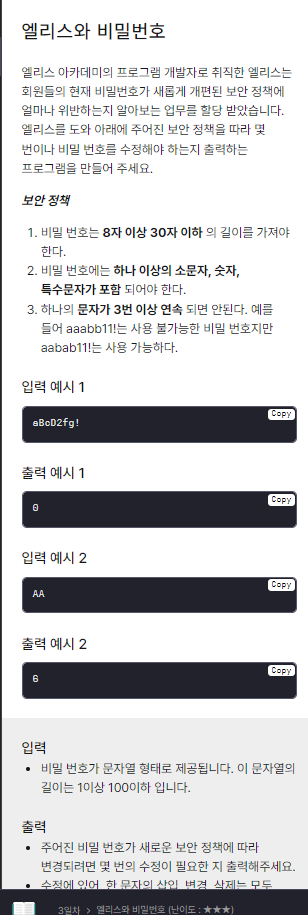

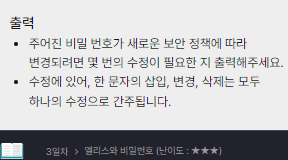

# ex09(문자열 처리)

In [ ]:
def password(Str):

    p_lower = False
    p_number = False
    p_symbol = False
    p_conti = 0
    
    cnt = 0
    tmp = ''
    
    
    for c in Str:
    
        if c != tmp:
            tmp = c
            cnt = 0
        else:
            cnt += 1
            if cnt == 2:
                p_conti +=1
                cnt = -1
                
        if c>='a' and c<='z':
            p_lower = True
        if c>='0' and c<='9':
            p_number = True
        if c in '!@#$%^&*':
            p_symbol = True
    
    must_pl = 0
    need = 0
    
    if len(Str) < 8:
        must_pl = 8 - len(Str)
    if not p_lower:
        need+=1
    if not p_number:
        need+=1
    if not p_symbol:
        need+=1
    
    
    
    change = max(need, p_conti+must_pl)
    
    return change
    
# ABABABA
Str = input()

if len(Str) <= 30:
    print(password(Str))
else:
    Min = 987654321
    remove = len(Str) - 30
    for i in range(len(Str)-29):
        Min = min(Min,password(Str[i:i+30]))
    print(remove+Min)

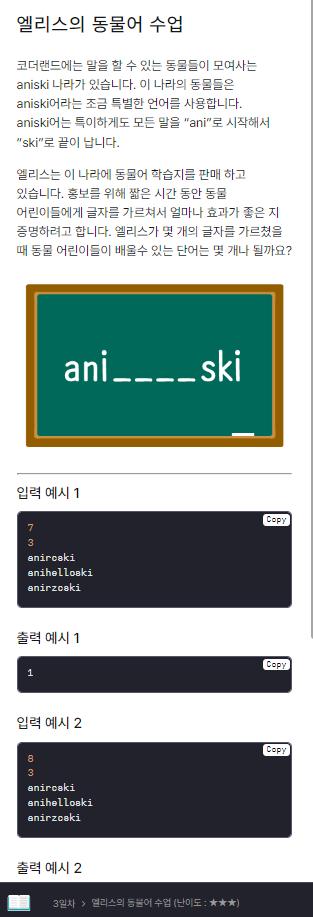

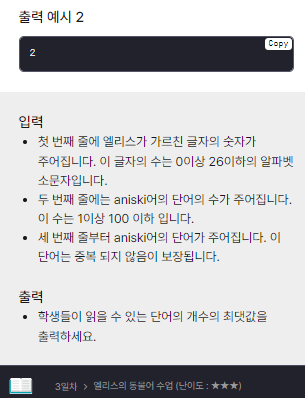

# ex10 (완전탐색 2일차 중복문제)

In [ ]:
num1 = int(input())
num2 = int(input())
Strs = []

for i in range(num2):
    Strs.append(input().replace('a','').replace('s','').replace('n','').replace('i','').replace('k',''))
num1-=5
Max = 0

def animal(Str):
    if len(Str) == num1:
        global Max
        cnt = 0
        for my_str in Strs:
            check = False
            for s in my_str:
                if s not in Str:
                    check = True
                    break
            if not check:
                cnt += 1
        Max = max(Max, cnt)
        
    elif len(Str) == 0:
        for i in range(ord('a'),ord('z')+1):
            if chr(i) == 'a' or chr(i) == 's' or chr(i) == 'n' or chr(i) == 'i' or chr(i) == 'k':
                continue
            animal(Str + chr(i))
    else:
        for i in range(ord(Str[-1])+1,ord('z')+1):
            if chr(i) == 'a' or chr(i) == 's' or chr(i) == 'n' or chr(i) == 'i' or chr(i) == 'k':
                continue
            animal(Str + chr(i))
            
if num1<0:
    print(0)
else:
    animal('')
    print(Max)